<h3>Random Forest</h3>
This notebook uses random forest approach to predict/classify gout flare

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('../Data/processed_data.csv')

# Loading p-values
p_values = pd.read_csv('../Data/p_value_data.csv')
# Filter the p-values to get significant genes
significant_genes = p_values[p_values['P_Flare'] < 0.05]['GeneID'].tolist()

# Filter the dataset to keep only significant genes column names and flare
X = data[significant_genes]
y = data['Flare']



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6285714285714286
              precision    recall  f1-score   support

           1       0.60      0.71      0.65        17
           3       0.67      0.56      0.61        18

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.63      0.63      0.63        35



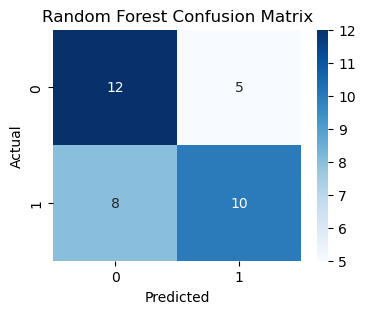

In [6]:
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()